<a href="https://colab.research.google.com/github/JungMYEONG-jin/Stats_Project/blob/window/MidTerm_Project/MidTerm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
ls -al

total 20
drwxr-xr-x 1 root root 4096 Apr  3 06:54 ./
drwxr-xr-x 1 root root 4096 Apr  3 06:53 ../
drwxr-xr-x 4 root root 4096 Mar 25 13:38 .config/
drwx------ 5 root root 4096 Apr  3 06:54 gdrive/
drwxr-xr-x 1 root root 4096 Mar 25 13:38 sample_data/


In [ ]:
cd sample_data

/content/sample_data


In [ ]:
ls -al

total 55516
drwxr-xr-x 1 root root     4096 Mar 25 13:38 ./
drwxr-xr-x 1 root root     4096 Apr  3 06:54 ../
-rwxr-xr-x 1 root root     1697 Jan  1  2000 anscombe.json*
-rw-r--r-- 1 root root   301141 Mar 25 13:38 california_housing_test.csv
-rw-r--r-- 1 root root  1706430 Mar 25 13:38 california_housing_train.csv
-rw-r--r-- 1 root root 18289443 Mar 25 13:38 mnist_test.csv
-rw-r--r-- 1 root root 36523880 Mar 25 13:38 mnist_train_small.csv
-rwxr-xr-x 1 root root      930 Jan  1  2000 README.md*


In [ ]:
cd ../gdrive/

/content/gdrive


In [ ]:
ls -al


total 16
dr-x------  2 root root 4096 Apr  3 06:54 .file-revisions-by-id/
drwx------ 11 root root 4096 Apr  3 06:54 MyDrive/
dr-x------  2 root root 4096 Apr  3 06:54 .shortcut-targets-by-id/
drwx------  2 root root 4096 Apr  3 06:54 .Trash/


In [ ]:
cd MyDrive

/content/gdrive/MyDrive


In [ ]:
ls -al


total 202913
drwx------ 2 root root     4096 Dec 30 01:11 '서울대 논문'/
drwx------ 2 root root     4096 Dec 30 07:30  유플러스/
drwx------ 2 root root     4096 Sep 12  2020  삼성카드/
drwx------ 2 root root     4096 Mar 21 14:34  토익듣기/
drwx------ 2 root root     4096 Mar 15 02:25 '블록체인 작업증명'/
-rw------- 1 root root 83555532 Dec 23 08:44  검수양식_07216507정명진.pptx
-rw------- 1 root root      151 May 26  2020 '제목없는 문서 (10).gdoc'
-rw------- 1 root root      151 May 23  2020 '제목없는 문서 (11).gdoc'
-rw------- 1 root root 24840782 Sep  4  2019  125983744-1.pdf
-rw------- 1 root root      151 May 19  2020 '제목없는 문서 (12).gdoc'
-rw------- 1 root root      151 Feb 25  2020 '제목없는 문서 (13).gdoc'
-rw------- 1 root root      151 Dec 18 02:59 '복학 1.gdoc'
-rw------- 1 root root      151 Oct  5 23:45 '제목없는 문서 (1).gdoc'
-rw------- 1 root root      151 Jan 12 05:52 '1학기 수업.gdoc'
-rw------- 1 root root   196127 Feb

# Data Load and Data Information

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from wordcloud import WordCloud
import pandas as pd


In [ ]:


temp = pd.read_csv('midterm/Fake.csv')

In [ ]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


### Fake news is composed 23481 rows and 4 columns

In [ ]:
temp.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

In [ ]:
temp.head(6)

title  ...               date
0   Donald Trump Sends Out Embarrassing New Year’...  ...  December 31, 2017
1   Drunk Bragging Trump Staffer Started Russian ...  ...  December 31, 2017
2   Sheriff David Clarke Becomes An Internet Joke...  ...  December 30, 2017
3   Trump Is So Obsessed He Even Has Obama’s Name...  ...  December 29, 2017
4   Pope Francis Just Called Out Donald Trump Dur...  ...  December 25, 2017
5   Racist Alabama Cops Brutalize Black Boy While...  ...  December 25, 2017

[6 rows x 4 columns]

# Subject Analysis

### Analyze news category

In [ ]:
temp.subject.value_counts()

News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64

In [ ]:
temp.shape

(23481, 4)

### Visualize news category distribution

#### News and Politics are dominant subject.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


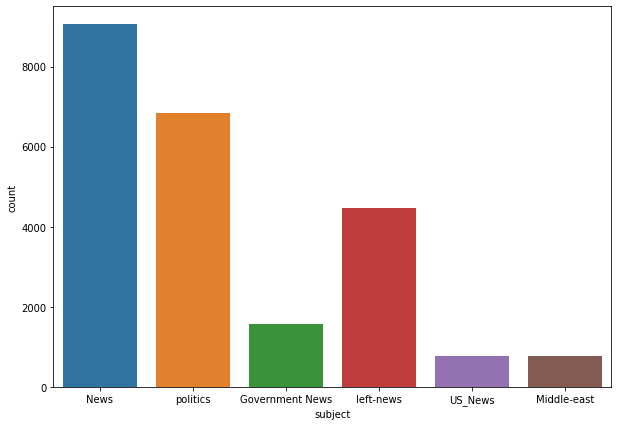

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot('subject',data= temp)
plt.show()

### 불용어 처리를 위한 stopwords 

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# word cloud 실행
text=""

for i in temp.text.values:
  text+=f" {i}"
wordcloud = WordCloud(
    width=3000,
    height=2000,
    background_color = "black",
    stopwords = set(nltk.corpus.stopwords.words("english"))).generate(text)



In [ ]:
wordcloud

# Wordcloud for Fake news data

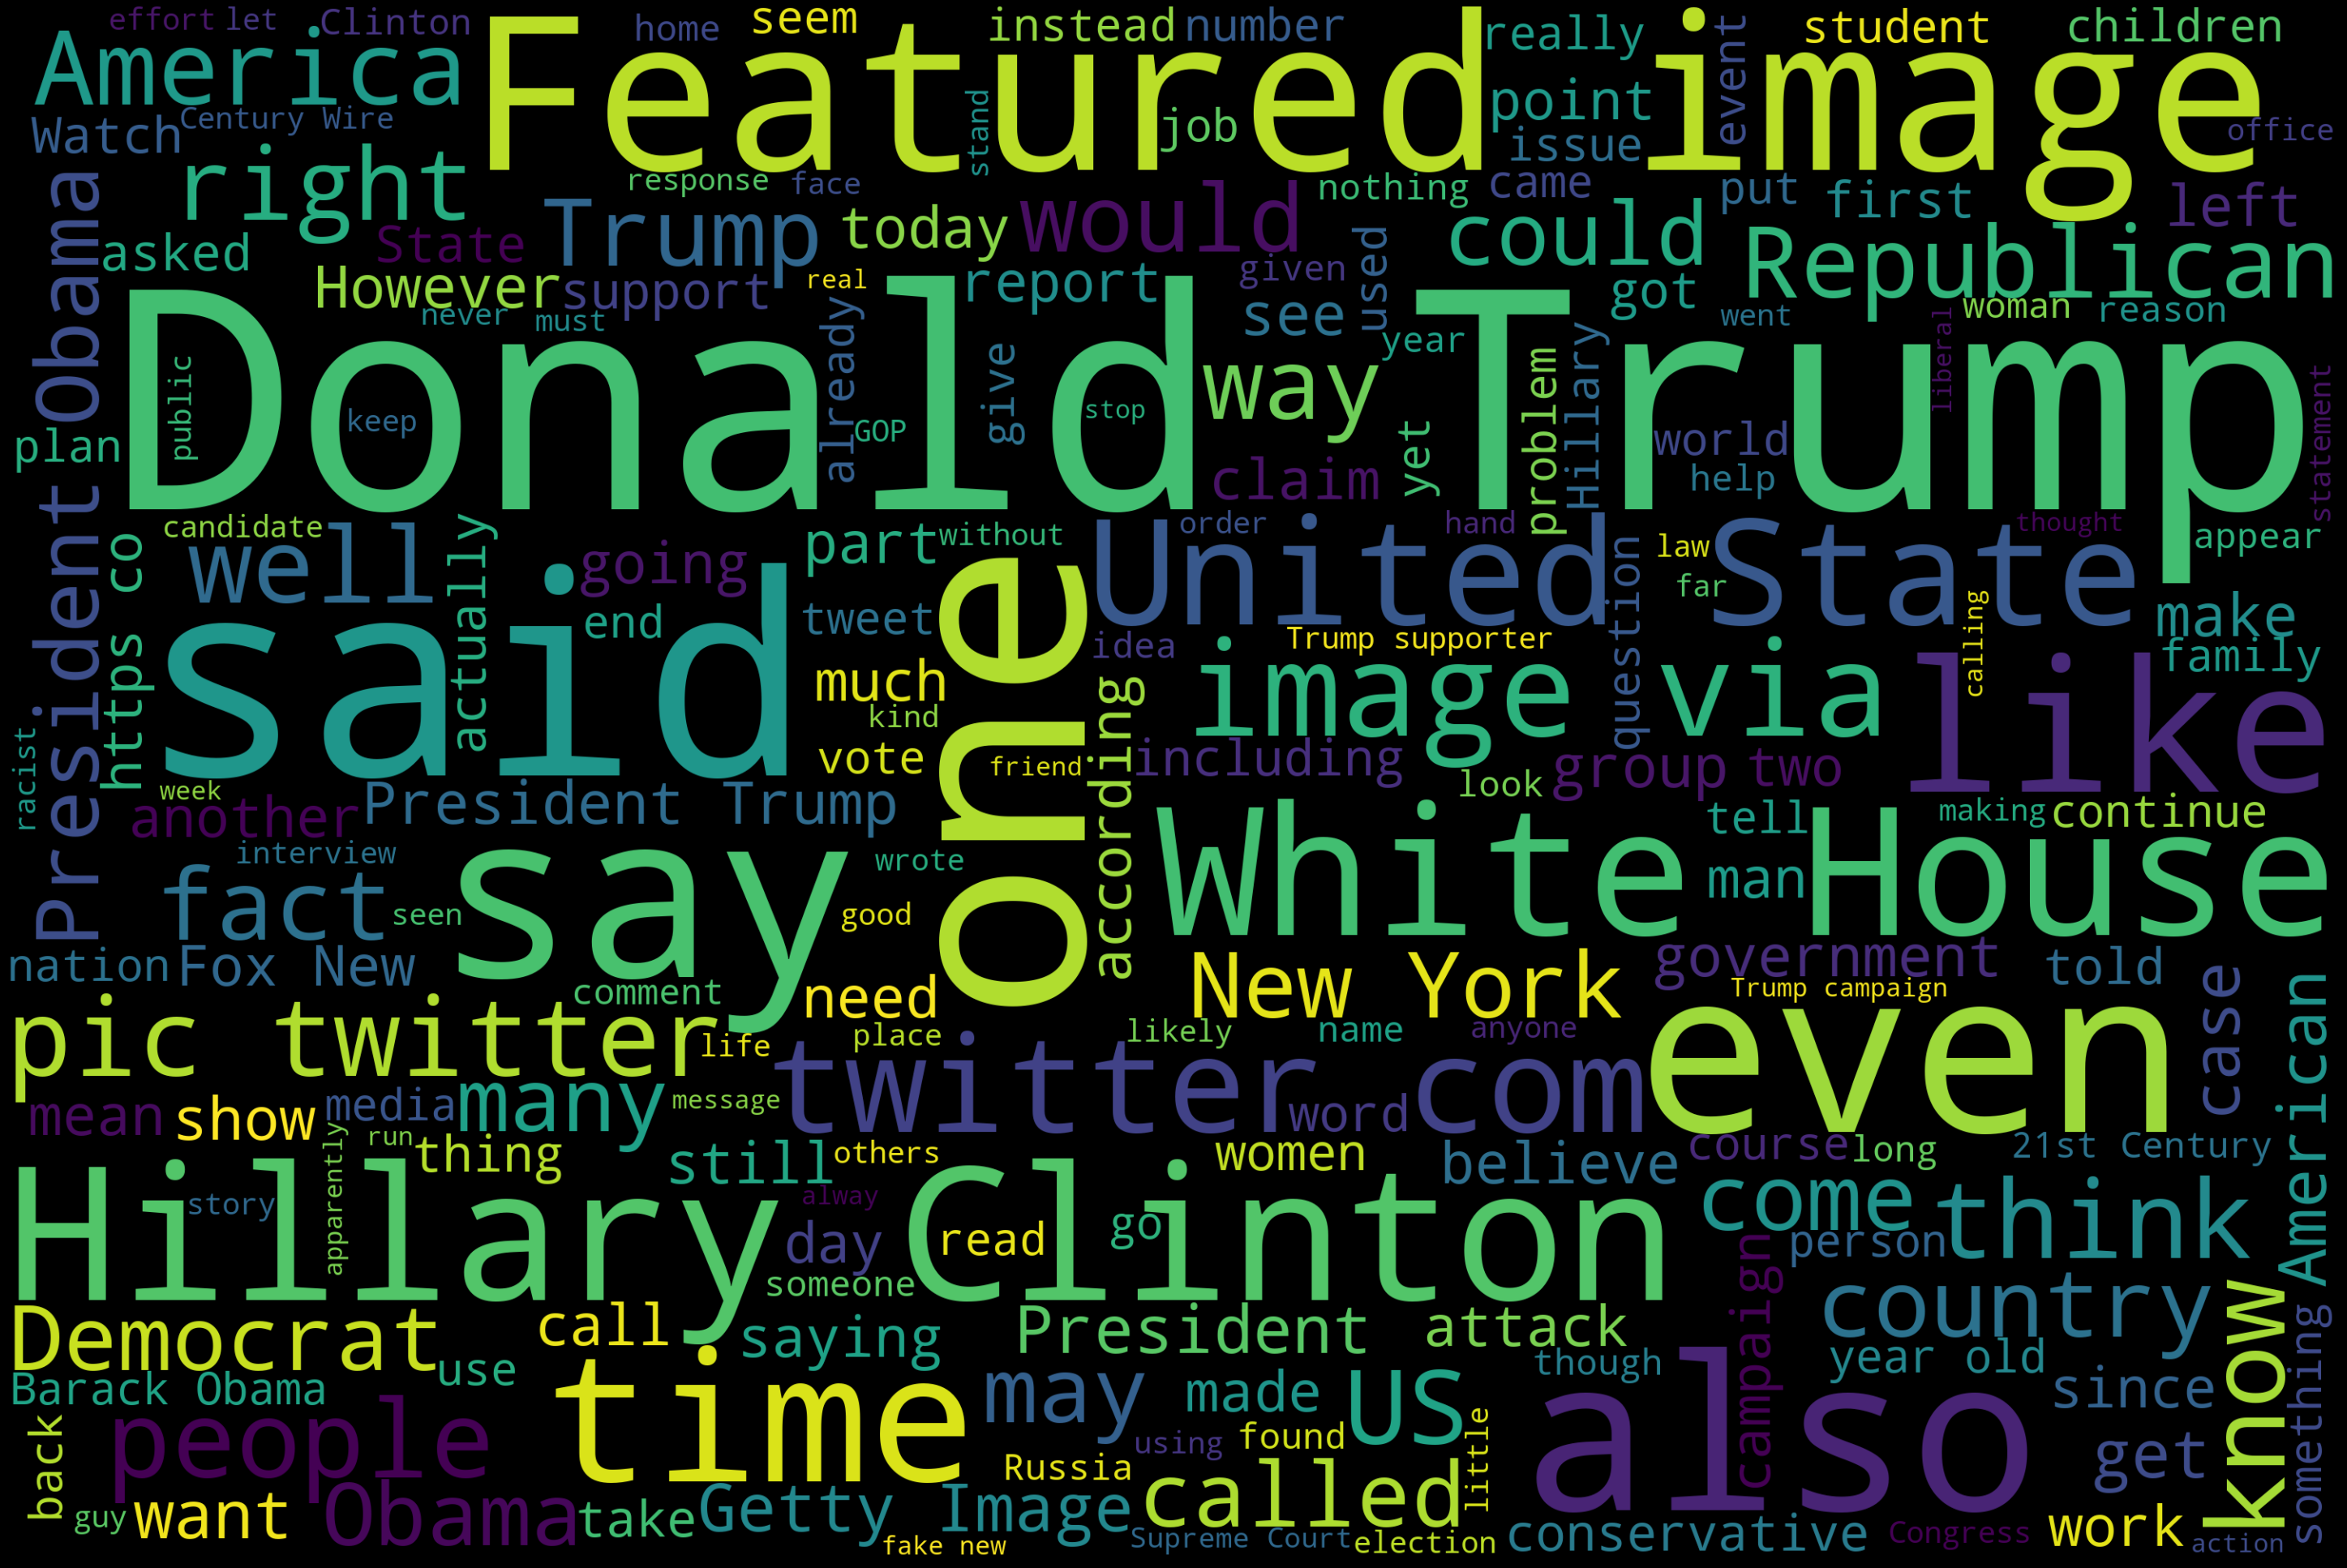

In [ ]:
fig = plt.figure(figsize=(40,30), 
                 facecolor='k',
                 edgecolor='k')


plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


# Load Real data and Analyze

In [ ]:
real = pd.read_csv('midterm/True.csv')

real.head(6)

title  ...                date
0  As U.S. budget fight looms, Republicans flip t...  ...  December 31, 2017 
1  U.S. military to accept transgender recruits o...  ...  December 29, 2017 
2  Senior U.S. Republican senator: 'Let Mr. Muell...  ...  December 31, 2017 
3  FBI Russia probe helped by Australian diplomat...  ...  December 30, 2017 
4  Trump wants Postal Service to charge 'much mor...  ...  December 29, 2017 
5  White House, Congress prepare for talks on spe...  ...  December 29, 2017 

[6 rows x 4 columns]

In [ ]:
real['text'][0]

'WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non-defense “discretionary” spending on programs that support educat

In [ ]:
real['text'][2121]

'WASHINGTON (Reuters) - Donald Trump on Thursday fired back at a critic in his own party who had denounced the president’s response to the Charlottesville, Virginia, attack, saying he had not drawn a “moral equivalency” between white hate groups and counter-protesters. Trump, on Twitter, called fellow Republican U.S. Senator Lindsey Graham’s statement a day earlier “a disgusting lie.” On Wednesday, Graham had said Trump’s statements after the weekend attack had suggested “moral equivalency” between the two sides and urged him to instead use his words to heal Americans instead. '

# Data Cleaning

### Delete pulbication like Reuters that mean global news headquarter in London... The publication information is not important for classifying news.

In [ ]:
not_public = []
for idx, val in enumerate(real.text.values):
  try:
    value = val.split(" -", maxsplit=1)
    value[1]

    assert(len(value[0])<260)
  except:
    not_public.append(idx) # index store

In [ ]:
not_public

[3488,
 4358,
 4465,
 5784,
 6660,
 6823,
 7922,
 8194,
 8195,
 8247,
 8465,
 8481,
 8482,
 8505,
 8506,
 8771,
 8970,
 9008,
 9009,
 9307,
 9618,
 9737,
 10479]

In [ ]:
# using iloc
real.iloc[not_public]['text']

3488     The White House on Wednesday disclosed a group...
4358     Neil Gorsuch, President Donald Trump’s appoint...
4465     WASHINGTON The clock began running out this we...
5784     Federal appeals court judge Neil Gorsuch, the ...
6660     Republican members of Congress are complaining...
6823     Over the course of the U.S. presidential campa...
7922     After going through a week reminiscent of Napo...
8194     The following timeline charts the origin and s...
8195     Global health officials are racing to better u...
8247     U.S. President Barack Obama visited a street m...
8465     ALGONAC, MICH.—Parker Fox drifted out of the D...
8481     Global health officials are racing to better u...
8482     The following timeline charts the origin and s...
8505     Global health officials are racing to better u...
8506     The following timeline charts the origin and s...
8771     In a speech weighted with America’s complicate...
8970                                                    

In [ ]:
# check wether there is a pulbication information

for i in not_public:
  print(real.iloc[i]['text'])
  

The White House on Wednesday disclosed a group of former lobbyists working in President Donald Trump’s administration who have been issued ethics waivers, following a request from the U.S. government’s ethics agency. The list of at least 11 waivers include White House adviser Kellyanne Conway and Trump's Chief of Staff Reince Priebus, according to a chart issued on the White House website. (bit.ly/1LPKWx8) Conway is permitted to “participate in communications and meetings involving former clients which are political, advocacy, trade or non-profit organizations,” while Priebus, a former Republican National Committee chairman, is allowed to have communications and meetings with the RNC, the document says. Shortly after taking office in January, Trump signed an executive order barring lobbyists who joined the administration from working on issues related to their prior work. But the administration has the power to grant waivers to particular hires, exempting them from that restriction. Al

In [ ]:
# index 8970 is empty
real.iloc[8970]

title      Graphic: Supreme Court roundup
text                                     
subject                      politicsNews
date                       June 16, 2016 
Name: 8970, dtype: object

# Get Publisher information from text of real news.

In [ ]:
public = []
text_temp = []
for idx, i in enumerate(real.text.values):
  if idx in not_public:
    text_temp.append(i)

    public.append("Unknown")
    continue
  record = i.split(" -", maxsplit=1)
  public.append(record[0])
  text_temp.append(record[1])


  

In [ ]:
# All the publisher list
public

['WASHINGTON (Reuters)',
 'WASHINGTON (Reuters)',
 'WASHINGTON (Reuters)',
 'WASHINGTON (Reuters)',
 'SEATTLE/WASHINGTON (Reuters)',
 'WEST PALM BEACH, Fla./WASHINGTON (Reuters)',
 'WEST PALM BEACH, Fla (Reuters)',
 'The following statements\xa0were posted to the verified Twitter accounts of U.S. President Donald Trump, @realDonaldTrump and @POTUS.  The opinions expressed are his own.\xa0Reuters has not edited the statements or confirmed their accuracy.  @realDonaldTrump :',
 'The following statements\xa0were posted to the verified Twitter accounts of U.S. President Donald Trump, @realDonaldTrump and @POTUS.  The opinions expressed are his own.\xa0Reuters has not edited the statements or confirmed their accuracy.  @realDonaldTrump :',
 'WASHINGTON (Reuters)',
 '(Reuters)',
 'NEW YORK/WASHINGTON (Reuters)',
 'The following statements\xa0were posted to the verified Twitter accounts of U.S. President Donald Trump, @realDonaldTrump and @POTUS.  The opinions expressed are his own.\xa0Reuter

In [ ]:
real["public"] = public
real["text"] = text_temp

In [ ]:
del public, text_temp, record

In [ ]:
real.head(6)

title  ...                                      public
0  As U.S. budget fight looms, Republicans flip t...  ...                        WASHINGTON (Reuters)
1  U.S. military to accept transgender recruits o...  ...                        WASHINGTON (Reuters)
2  Senior U.S. Republican senator: 'Let Mr. Muell...  ...                        WASHINGTON (Reuters)
3  FBI Russia probe helped by Australian diplomat...  ...                        WASHINGTON (Reuters)
4  Trump wants Postal Service to charge 'much mor...  ...                SEATTLE/WASHINGTON (Reuters)
5  White House, Congress prepare for talks on spe...  ...  WEST PALM BEACH, Fla./WASHINGTON (Reuters)

[6 rows x 5 columns]

# Public Column has been added. It means publisher.

In [ ]:
# check empty index
[idx for idx, i in enumerate(real.text.values) if str(i).strip()=='']

[8970]

## Drop empty row

In [ ]:
real.drop(8970, inplace=True)

In [ ]:
[idx for idx, i in enumerate(real.text.values) if str(i).strip()=='']
# now there is no empty row in real data

[]

In [ ]:
fake_empty = [idx for idx, i in enumerate(temp.text.values) if str(i).strip()=='']

# how many empty row
print(f'Empty row: {len(fake_empty)}')
temp.iloc[fake_empty]

Empty row: 630


title  ...          date
10923  TAKE OUR POLL: Who Do You Think President Trum...  ...  May 10, 2017
11041  Joe Scarborough BERATES Mika Brzezinski Over “...  ...  Apr 26, 2017
11190  WATCH TUCKER CARLSON Scorch Sanctuary City May...  ...   Apr 6, 2017
11225  MAYOR OF SANCTUARY CITY: Trump Trying To Make ...  ...   Apr 2, 2017
11236  SHOCKER: Public School Turns Computer Lab Into...  ...   Apr 1, 2017
...                                                  ...  ...           ...
21816  BALTIMORE BURNS: MARYLAND GOVERNOR BRINGS IN N...  ...  Apr 27, 2015
21826  FULL VIDEO: THE BLOCKBUSTER INVESTIGATION INTO...  ...  Apr 25, 2015
21827  (VIDEO) HILLARY CLINTON: RELIGIOUS BELIEFS MUS...  ...  Apr 25, 2015
21857  (VIDEO)ICE PROTECTING OBAMA: WON’T RELEASE NAM...  ...  Apr 14, 2015
21873  (VIDEO) HYSTERICAL SNL TAKE ON HILLARY’S ANNOU...  ...  Apr 12, 2015

[630 rows x 4 columns]

In [ ]:
# total row for real news
print(f'total rows: {real.shape[0]}')


real.subject.value_counts()

total rows: 21416


politicsNews    11271
worldnews       10145
Name: subject, dtype: int64

## Real news category distribution

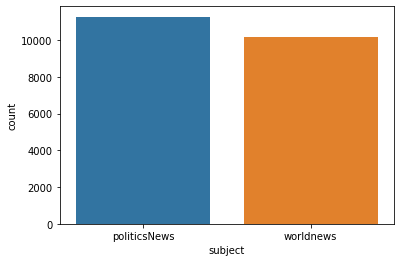

In [ ]:
sns.countplot(x="subject", data=real)
plt.show()

## Word Cloud for real news

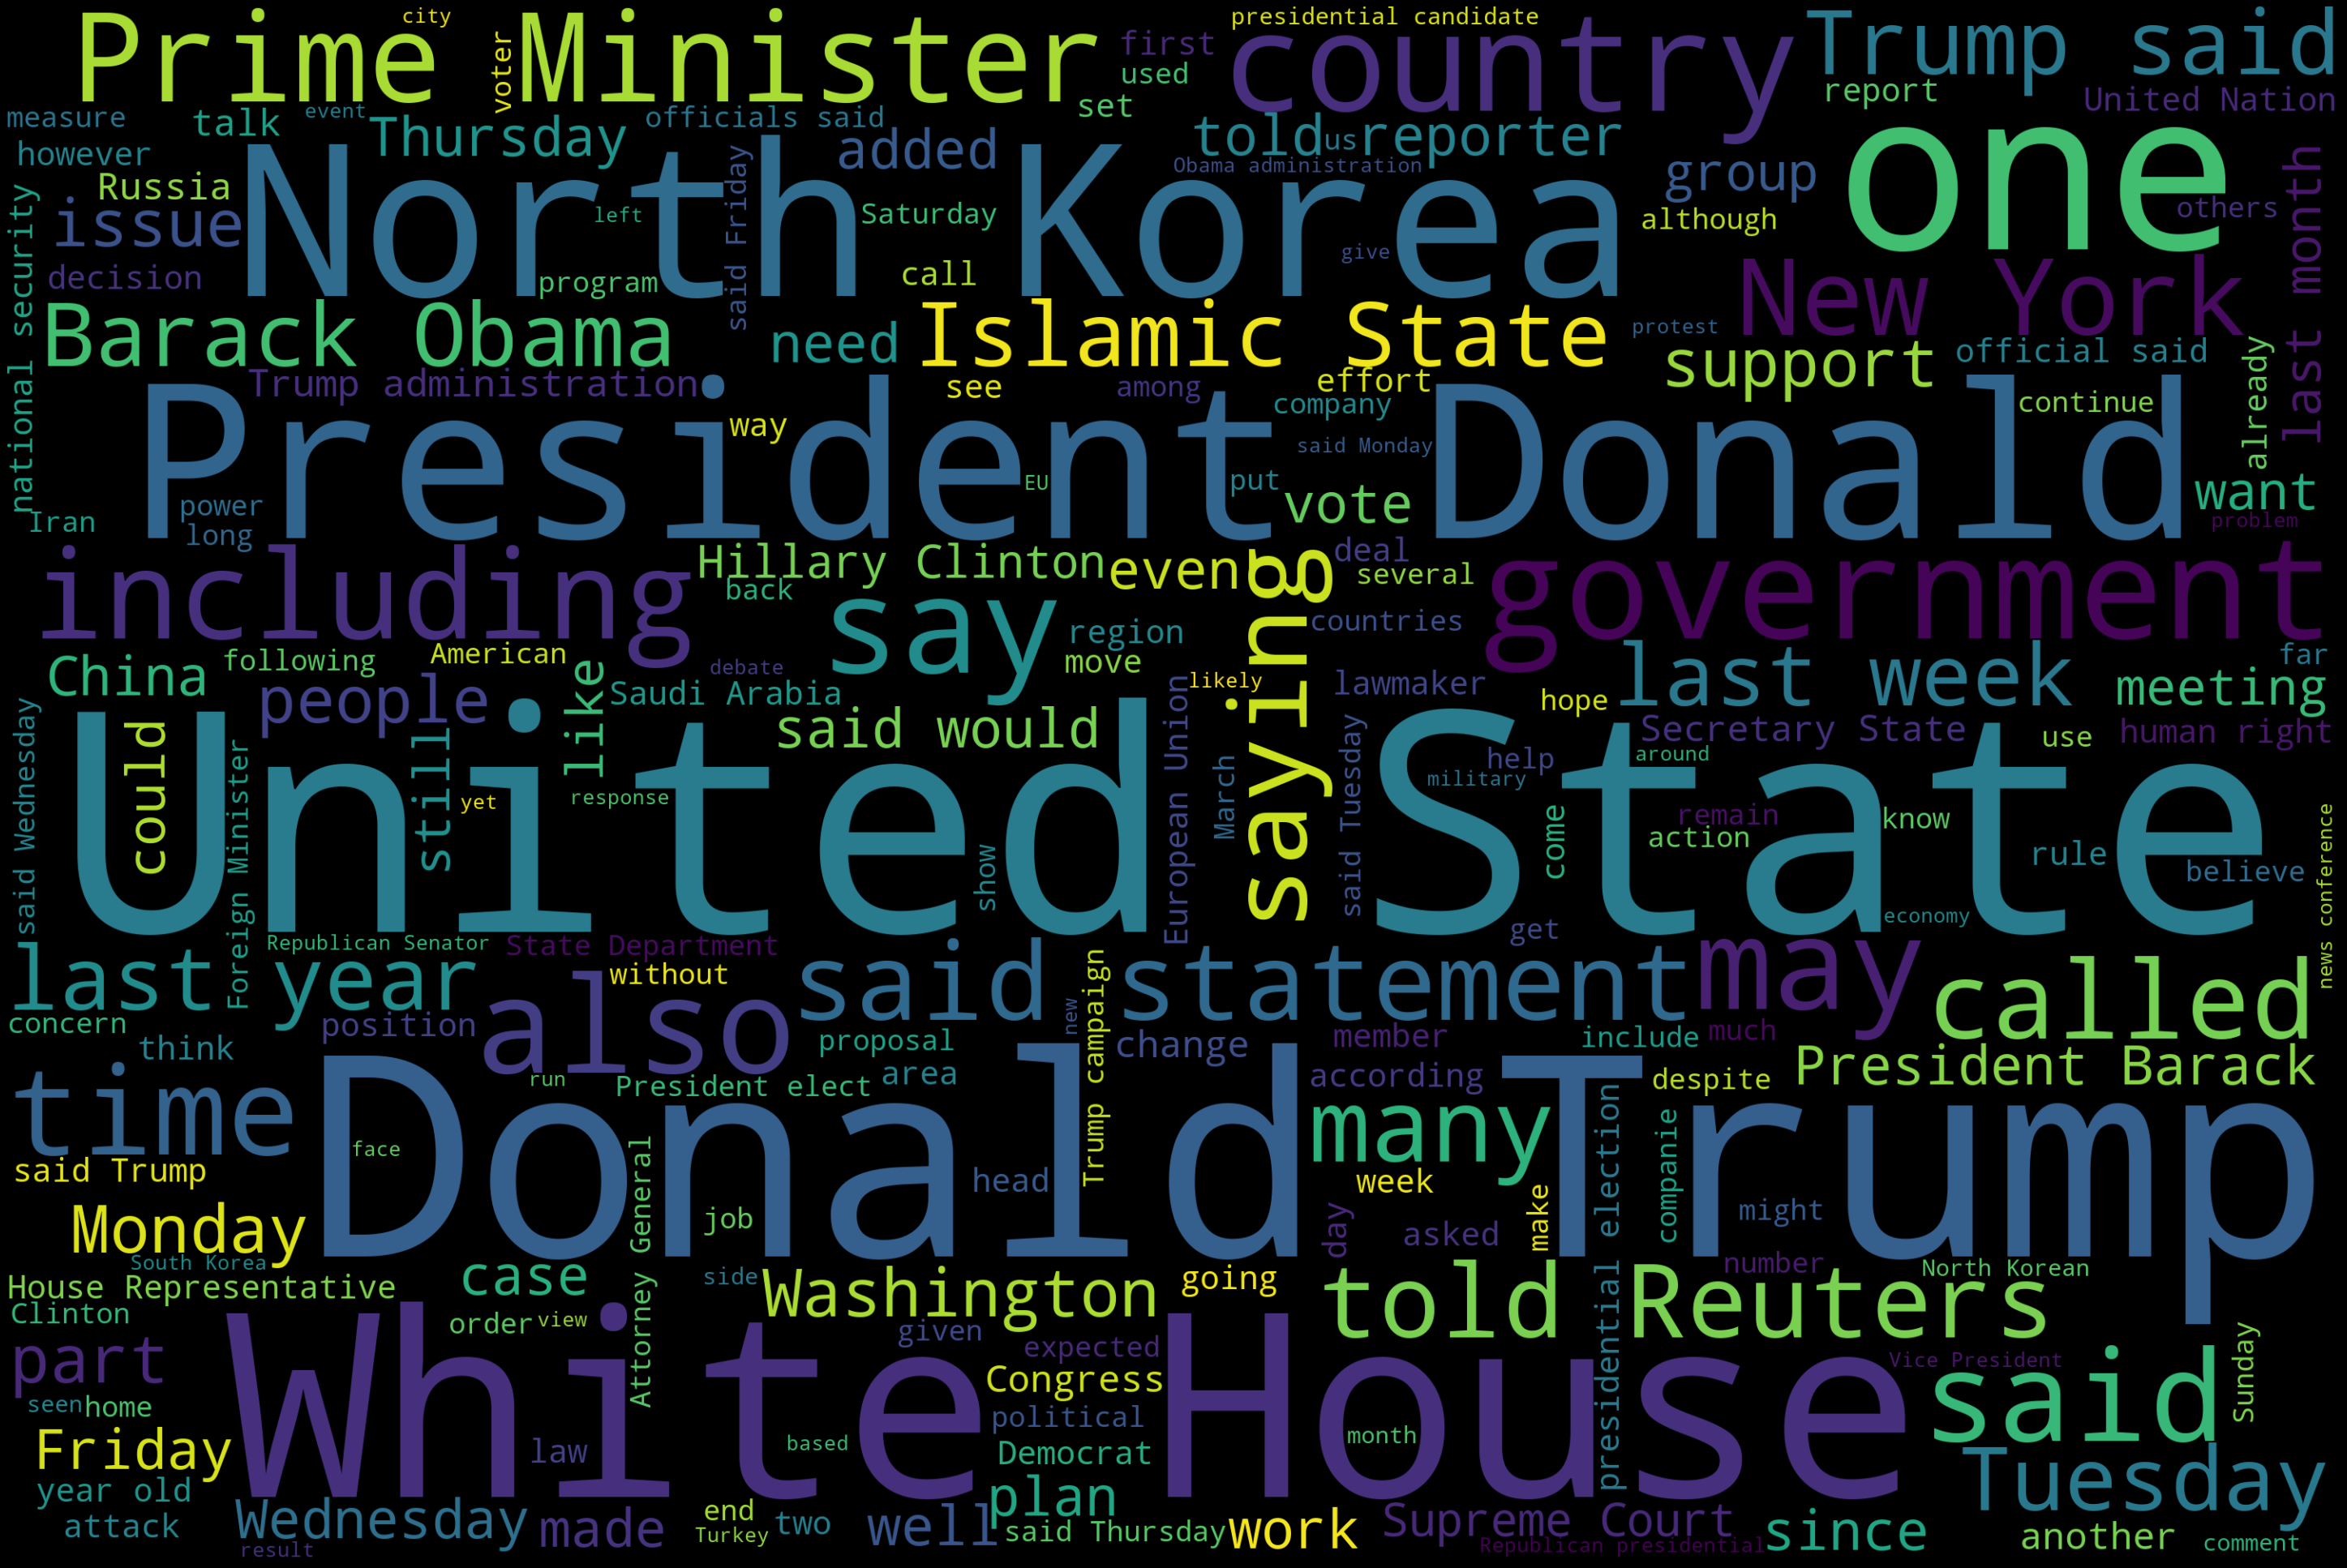

In [ ]:
text=""

for i in real.text.values:
  text+=f" {i}"
wordcloud = WordCloud(
    width=3000,
    height=2000,
    background_color = "black",
    stopwords = set(nltk.corpus.stopwords.words("english"))).generate(str(text))

fig = plt.figure(figsize=(40,30), 
                 facecolor='k',
                 edgecolor='k')


plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()
del text


# Text Preprocessing

### real news 1, fake news 0

In [ ]:
real['class'] = 1
temp['class'] = 0

In [ ]:
# Append text to Title

real['text'] = real['title'] +" "+real['text']
temp['text'] = temp['title'] +" "+temp['text']

In [ ]:
# Subject in real and fake news are different
# Drop subject and Date.
# date is not important
real.drop(["subject", "date", "title", "public"], axis=1, inplace=True)
temp.drop(["subject", "date", "title"], axis=1, inplace=True)

In [ ]:
real

text  class
0      As U.S. budget fight looms, Republicans flip t...      1
1      U.S. military to accept transgender recruits o...      1
2      Senior U.S. Republican senator: 'Let Mr. Muell...      1
3      FBI Russia probe helped by Australian diplomat...      1
4      Trump wants Postal Service to charge 'much mor...      1
...                                                  ...    ...
21412  'Fully committed' NATO backs new U.S. approach...      1
21413  LexisNexis withdrew two products from Chinese ...      1
21414  Minsk cultural hub becomes haven from authorit...      1
21415  Vatican upbeat on possibility of Pope Francis ...      1
21416  Indonesia to buy $1.14 billion worth of Russia...      1

[21416 rows x 2 columns]

In [ ]:
temp

text  class
0       Donald Trump Sends Out Embarrassing New Year’...      0
1       Drunk Bragging Trump Staffer Started Russian ...      0
2       Sheriff David Clarke Becomes An Internet Joke...      0
3       Trump Is So Obsessed He Even Has Obama’s Name...      0
4       Pope Francis Just Called Out Donald Trump Dur...      0
...                                                  ...    ...
23476  McPain: John McCain Furious That Iran Treated ...      0
23477  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...      0
23478  Sunnistan: US and Allied ‘Safe Zone’ Plan to T...      0
23479  How to Blow $700 Million: Al Jazeera America F...      0
23480  10 U.S. Navy Sailors Held by Iranian Military ...      0

[23481 rows x 2 columns]

In [ ]:
# Combine real and fake news
total_news = real.append(temp, ignore_index=True)

In [ ]:
total_news.head(3)

text  class
0  As U.S. budget fight looms, Republicans flip t...      1
1  U.S. military to accept transgender recruits o...      1
2  Senior U.S. Republican senator: 'Let Mr. Muell...      1

In [ ]:
total_news.shape

(44897, 2)

In [ ]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# target value
y = total_news['class'].values


# NLP Processing

### Use nltk for removing stopwords like a, an, the...

In [ ]:
X = []
stop_words = set(nltk.corpus.stopwords.words("english"))
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
for i in total_news["text"].values:
  tmp=[]
  sentences = nltk.sent_tokenize(i)
  for j in sentences:
    j = j.lower()
    tokens = tokenizer.tokenize(j)
    filtering = [w.strip() for w in tokens if w not in stop_words and len(w)>1]
    tmp.extend(filtering)
  X.append(tmp)



In [ ]:
len(X)

44897

# Word2Vec

### I will use LSTM model. So i need Embedding Vector. Word2Vec is very useful to make Embedding Vector. I will use Word2Vec based on SkipGram method because the data is so big.
### When data is big enough, then SkipGram is better than CBOW 

In [ ]:
import gensim

In [ ]:
# Embedding dimension
Embed_Dim = 100

# Word2Vec model
wv = gensim.models.Word2Vec(sentences=X, size=Embed_Dim, window=5, min_count=1)

In [ ]:
# vocabulary size
len(wv.wv.vocab)

122248

In [ ]:
# when 2020 trump and corona is famous gassip in USA
print(wv['trump'])
print(wv['china'])
print(wv['corona'])

[-5.3682528   0.8383542   0.4104385   3.9931393   2.042647   -0.6704363
  0.11985864 -0.38836828  0.58727664 -0.58340263  3.0978982  -0.5504021
  0.8772757   1.0356294   1.7960006  -0.7727921   0.73379105 -2.3915105
  1.7415115   1.1090541   0.8989575   1.7892884   0.89232355 -0.41071424
  0.8411327  -1.4540203   1.8506174   0.9199599  -0.26040536 -0.8097955
  0.02166238  0.0928188   0.38686565  2.5311694   0.24240467  1.8282413
  0.9727619   2.8798091   0.3845317  -0.82252115 -0.3730596  -2.9675756
 -2.7402434  -0.6291876  -0.3358419   0.4441159   0.05047392 -0.2633389
 -2.4917881   1.632885    0.20942304  2.212137    0.17060255 -0.29807574
 -1.103474   -1.0753932   0.58193433 -0.59791183  2.980957    3.8627083
  2.8530018   0.59302807 -1.5697554  -1.054775    0.9767456   0.44464082
 -1.4021553   1.2079186  -1.1887754   0.72156894 -0.24987227 -2.3790514
  0.75473666 -0.07989213  2.839067    0.44052416 -0.594566    0.87493986
 -0.40941623  0.58104914  2.7006025   0.11920293 -0.617626  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.


In [ ]:
# word2vec has similarity 단어간 유사도
wv.wv.most_similar("china")

[('beijing', 0.8183814883232117),
 ('taiwan', 0.7585859298706055),
 ('chinese', 0.7248335480690002),
 ('taipei', 0.6507993340492249),
 ('japan', 0.6432931423187256),
 ('india', 0.6392225027084351),
 ('xi', 0.6277444958686829),
 ('waterway', 0.6124681234359741),
 ('vietnam', 0.5906205177307129),
 ('bilateral', 0.5728162527084351)]

In [ ]:
wv.wv.most_similar("corona")

[('geico_service', 0.7483070492744446),
 ('maxima', 0.7410085201263428),
 ('e82gffdtvv', 0.7396368980407715),
 ('vanessawbal', 0.738128125667572),
 ('discurso', 0.7367886304855347),
 ('rianna', 0.7310836315155029),
 ('hatteras', 0.730419933795929),
 ('onthursday', 0.7302225828170776),
 ('ndwubnoy7a', 0.7300974130630493),
 ('lacanlune', 0.7298961281776428)]

In [ ]:
wv.wv.most_similar("google")

[('fb', 0.7520185708999634),
 ('alphabet', 0.7499154210090637),
 ('googl', 0.672432541847229),
 ('reddit', 0.6718230247497559),
 ('apple', 0.6698498129844666),
 ('amazon', 0.6663280129432678),
 ('app', 0.6659268140792847),
 ('facebook', 0.6608862280845642),
 ('microsoft', 0.6606901288032532),
 ('users', 0.6543864011764526)]

In [ ]:
wv.wv.most_similar(positive=["trump", "obama"])

[('elect', 0.5868184566497803),
 ('incoming', 0.5724375247955322),
 ('haaaaaaay', 0.5292196273803711),
 ('cruz', 0.5186017155647278),
 ('bush', 0.49845293164253235),
 ('course', 0.4790496826171875),
 ('outright', 0.46797287464141846),
 ('amateur', 0.4618794322013855),
 ('actually', 0.454956978559494),
 ('bartlet', 0.4456455409526825)]

In [ ]:
wv.wv.most_similar(positive=["china", "corona"])

[('transactional', 0.6946005821228027),
 ('taipei', 0.6754518747329712),
 ('taiyuan', 0.6652122735977173),
 ('souring', 0.6536984443664551),
 ('suspecting', 0.6512110829353333),
 ('sino', 0.6485020518302917),
 ('rebalancing', 0.6476632356643677),
 ('shoals', 0.6380214691162109),
 ('rebalance', 0.6377789974212646),
 ('bilaterally', 0.6332273483276367)]

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Conv1D, MaxPool1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

### I will use this embedding vector at Embedding Layer of LSTM model. But we can't pass words to embedding layer. It must be expressed by number.
### So Tokenize each word ny number.

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)

X = tokenizer.texts_to_sequences(X)

In [ ]:
# every word has been expressed with numbers
X[0]

[389,
 395,
 10495,
 54,
 5509,
 1286,
 4840,
 315,
 205,
 16,
 6191,
 101,
 692,
 161,
 1024,
 2855,
 48,
 823,
 350,
 94,
 1094,
 72,
 1286,
 205,
 242,
 1034,
 389,
 7546,
 1050,
 1652,
 3232,
 7782,
 75,
 231,
 54,
 710,
 785,
 7521,
 513,
 1785,
 340,
 221,
 1677,
 410,
 450,
 87,
 596,
 321,
 16766,
 1242,
 316,
 656,
 7847,
 112,
 321,
 1332,
 274,
 767,
 87,
 389,
 395,
 223,
 1560,
 337,
 211,
 115,
 34,
 388,
 485,
 25,
 1930,
 1418,
 54,
 1010,
 297,
 245,
 101,
 3,
 13,
 1,
 54,
 95,
 284,
 389,
 876,
 85,
 596,
 108,
 10,
 95,
 11985,
 3468,
 618,
 262,
 12726,
 596,
 907,
 71,
 877,
 4042,
 992,
 1351,
 84,
 214,
 1290,
 1110,
 1,
 62,
 203,
 1266,
 46,
 60,
 876,
 618,
 262,
 12726,
 596,
 58,
 7521,
 489,
 638,
 3384,
 12,
 678,
 1997,
 2,
 234,
 108,
 96,
 367,
 137,
 303,
 14,
 350,
 1206,
 219,
 444,
 58,
 1286,
 205,
 98,
 10962,
 1814,
 290,
 5,
 171,
 2,
 7521,
 231,
 54,
 692,
 503,
 520,
 28,
 823,
 7097,
 94,
 2193,
 359,
 10730,
 87,
 389,
 2183,
 1941,
 2194,

In [ ]:
# check out when the index starts 0 or 1?
index = tokenizer.word_index
for word, number in index.items():
  print(word+"  "+str(number))
  if number==10:
    break

# the start index is 1!


trump  1
said  2
president  3
would  4
people  5
one  6
state  7
new  8
obama  9
also  10


# Many to One Model RNN

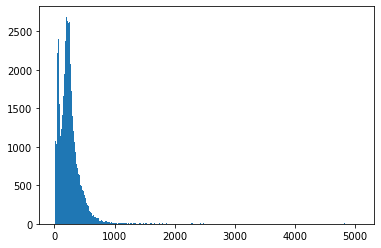

In [ ]:
# drawing word size
plt.hist([len(x) for x in X], bins=300)
plt.show()

In [ ]:
len_arr = np.array([len(x) for x in X])
len(len_arr[len_arr<700])

43982

### Use Padding method. Padding can make word size equal.
### Above the graph, we know that almost word size <=700~900 

In [ ]:
mlen = 700

X = pad_sequences(X, maxlen=mlen)

In [ ]:
for i in range(0, 10):
  print(len(X[i]))
# now all length is 700

700
700
700
700
700
700
700
700
700
700


In [ ]:
vocab_size = len(tokenizer.word_index)+1

In [ ]:
# now create weight matrix for embedding layer of LSTM

def get_w_matrix(model, vocab):
  vocab_size = len(vocab)+1
  w_matrix = np.zeros((vocab_size, Embed_Dim))
  for word, i in vocab.items():
    w_matrix[i] = model[word]
  return w_matrix

In [ ]:
embedding_vec = get_w_matrix(wv, index)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


# LSTM Model Setting

In [ ]:
model = Sequential()

model.add(Embedding(vocab_size, output_dim=Embed_Dim, weights=[embedding_vec], input_length=mlen, trainable=False))

# LSTM model
model.add(LSTM(units=128))
model.add(Dense(1, activation="sigmoid"))
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["acc"])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 700, 100)          12224900  
_________________________________________________________________
lstm (LSTM)                  (None, 128)               117248    
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 12,342,277
Trainable params: 117,377
Non-trainable params: 12,224,900
_________________________________________________________________


In [ ]:
train_x, test_x, train_y, test_y = train_test_split(X, y)

In [ ]:
model.fit(train_x, train_y, validation_split=0.3, epochs=6)

Epoch 1/6
737/737 [==============================] - 62s 40ms/step - loss: 0.1639 - acc: 0.9405 - val_loss: 0.0845 - val_acc: 0.9714
Epoch 2/6
737/737 [==============================] - 28s 38ms/step - loss: 0.0838 - acc: 0.9700 - val_loss: 0.1013 - val_acc: 0.9656
Epoch 3/6
737/737 [==============================] - 28s 39ms/step - loss: 0.0638 - acc: 0.9772 - val_loss: 0.0461 - val_acc: 0.9852
Epoch 4/6
737/737 [==============================] - 29s 39ms/step - loss: 0.0329 - acc: 0.9886 - val_loss: 0.0333 - val_acc: 0.9896
Epoch 5/6
737/737 [==============================] - 29s 39ms/step - loss: 0.0185 - acc: 0.9941 - val_loss: 0.0333 - val_acc: 0.9899
Epoch 6/6
737/737 [==============================] - 29s 39ms/step - loss: 0.0146 - acc: 0.9954 - val_loss: 0.0290 - val_acc: 0.9894


In [ ]:
pred = (model.predict(test_x)>=0.5).astype("int")

### Embedding vector를 활용한 LSTM model이 99%의 정확도를 보여주는것을 알 수 있음.

In [ ]:
accuracy_score(test_y, pred)

0.9910022271714922

In [ ]:
print(classification_report(test_y, pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5876
           1       0.99      0.99      0.99      5349

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225

